# THAT TIME USE DATA SET

We didn't talk about it in class, so:

It's from the Harmonized European Time Use Survey, and says what everyone is up to every 10 minutes across a number of European countries. Even though it's based on time and not dates, you can use parse_dates=["StartTime"] with read_csv to read the time column in as a datetime.

You could then use something like

df[df['Country'] == 'Belgium'].plot(x='StartTime', y='Sleep and other personal care')

to plot when Belgium is asleep! You could also use .groupby to cluster by different countries. Another trick with the data is to convert it into hours per day. For example:

(df[(df['Country'] == 'France')]['TV and video']).sum() / 100

to see how many much time French people spend watching tv (...at least I'm pretty sure that's the right calculation.)

## Some questions...

Interesting data... Let's check on some stereotypes: 

- Are the guys in the meditereanen countries really working less than the folks in the mid north?
- Is it true that the folks in the north sleep a lot in winter -- in order to party day and night in summer?
- The cuisine of France and Italy is quite famous. But do these guys spend more time eating than the guys in other countries?
- Who has the longest ways to work? 
- Who enjoys the most freetime

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [5]:
df = pd.read_csv('../../../data/timeuse.csv', parse_dates=["StartTime"])

In [6]:
df.head()

,Country,StartTime,Work and study,Travel to/from work/study,Household work,Sleep and other personal care,Eating,Freetime,TV and video,Unspecified time
0,Belgium,2016-07-24 04:00:00,1.04,0.07,0.16,97.16,0.15,1.01,0.17,0.24
1,Belgium,2016-07-24 04:10:00,1.09,0.09,0.28,97.14,0.18,0.85,0.14,0.23
2,Belgium,2016-07-24 04:20:00,1.09,0.15,0.18,96.94,0.40,0.81,0.17,0.25
3,Belgium,2016-07-24 04:30:00,1.13,0.35,0.23,96.51,0.27,1.09,0.17,0.27
4,Belgium,2016-07-24 04:40:00,1.23,0.34,0.36,96.46,0.20,0.97,0.15,0.29


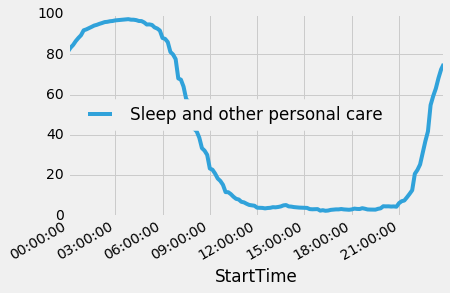

In [9]:
# Let's start with Somas example. 
plt.style.use('fivethirtyeight')
df[df['Country'] == 'Belgium'].plot(x='StartTime', y='Sleep and other personal care')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


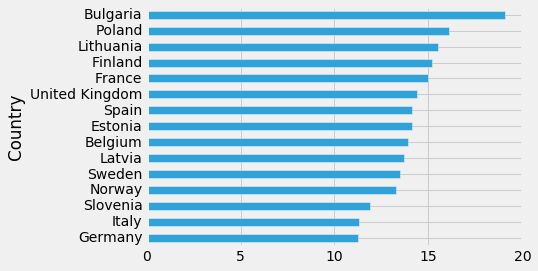

In [66]:
# Who sleeps the most? 
df_sleep = df.groupby(['Country'])[['Country','Sleep and other personal care']].median().sort(ascending=False)
df_sleep.sort_values(by='Sleep and other personal care', ascending=True).plot(kind='barh', legend=False)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


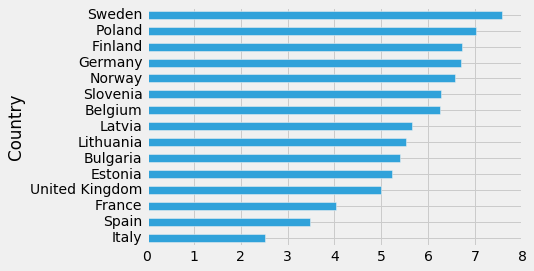

In [67]:
# Who spends the most time eating? 
df_eating = df.groupby(['Country'])[['Eating']].median().sort(ascending=False)
df_eating.sort_values(by='Eating', ascending=True).plot(kind='barh', legend=False)

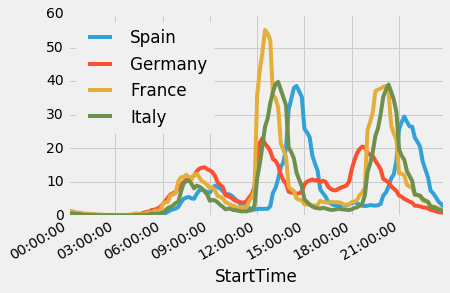

In [96]:
# Are the Spanish people really night owl eaters? 
#fig = plt.figure(figsize=[20,6])
ax = df[df['Country'] == 'Spain'].plot(x='StartTime', y='Eating', label='Spain')
ax = df[df['Country'] == 'Germany'].plot(x='StartTime', y='Eating', label = 'Germany', ax=ax)
ax = df[df['Country'] == 'France'].plot(x='StartTime', y='Eating', label = 'France', ax=ax)
ax = df[df['Country'] == 'Italy'].plot(x='StartTime', y='Eating', label = 'Italy', ax=ax)

In [84]:

df_spanish_late = df.loc[(df["Country"] == 'Spain') & (df["StartTime"] > '17:00'), ["Country", "StartTime"]]
df_spanish_late
#df_spanish_eating = df([df['Country'] == 'Spain'] & df['StartTime' > '17:00'])

,Country,StartTime
1519,Spain,2016-07-24 17:10:00
1520,Spain,2016-07-24 17:20:00
1521,Spain,2016-07-24 17:30:00
1522,Spain,2016-07-24 17:40:00
1523,Spain,2016-07-24 17:50:00
1524,Spain,2016-07-24 18:00:00
1525,Spain,2016-07-24 18:10:00
1526,Spain,2016-07-24 18:20:00
1527,Spain,2016-07-24 18:30:00
1528,Spain,2016-07-24 18:40:00


In [10]:
(df[(df['Country'] == 'France')]['TV and video']).sum() / 100

12.125599999999999

In [29]:
# What contries did participate? 
countries = df['Country'].get_values()

for country in countries: 
    print((df[(df[country] ==)]['Work and study']).sum() / 100)

KeyError: 'Belgium'